In [76]:
using CSV
using DataFrames
using LinearAlgebra
using Distances
using Ripserer

#  convert point cloud to df
function load_csv(file_path)
    df = CSV.read(file_path, DataFrame)
    data_matrix = convert(Matrix, df)
    return data_matrix
end

#  make distance matrix from data using euclidean distance
function make_dist_matrix(data_matrix)
    n = size(data_matrix, 1)
    dist_matrix = zeros(Float64, n, n)  # initializes square matrix
    for i in 1:n
        for j in 1:n
            dist_matrix[i, j] = euclidean(data_matrix[i, :], data_matrix[j, :])
        end
    end
    return dist_matrix
end

file_path = "points400_2.csv"  # this can be any of the point clouds

data_matrix = load_csv(file_path)
dist_matrix = make_dist_matrix(data_matrix)
sparse_matrix = sparse(dist_matrix)  # part of Ripserer through SparseArrays package, but haven't looked into it closely (?)
result = ripserer(sparse_matrix, dim_max=2)

println(result)

n is:399(399, 400)PersistenceDiagramsBase.PersistenceDiagram[399-element 0-dimensional PersistenceDiagram, 398-element 1-dimensional PersistenceDiagram, 111-element 2-dimensional PersistenceDiagram]


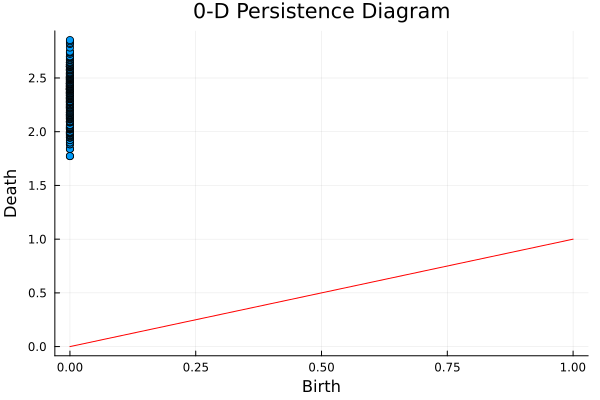

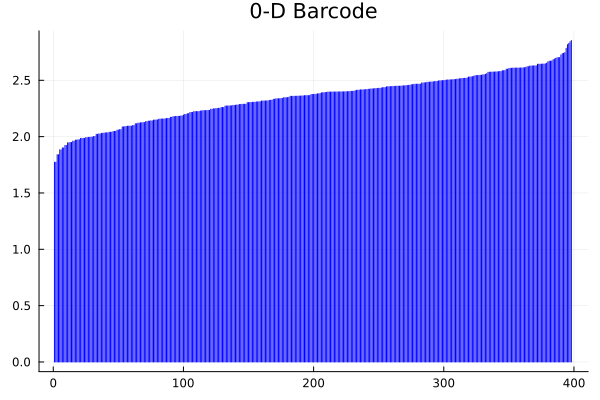

In [69]:
using Plots

d0_result = result[1]  # just the info for 0-d results
births = [birth(interval) for interval in d0_result]
deaths = [death(interval) for interval in d0_result]

p1 = scatter(births, deaths, xlabel="Birth", ylabel="Death", title="0-D Persistence Diagram", legend=false)
plot!(p1, x -> x, color=:red)
display(p1)

p2 = plot(title="0-D Barcode", legend=false)
for i in 1:length(births)
    plot!(p2, [i, i], [births[i], deaths[i]], label="", color=:blue)
end
display(p2)

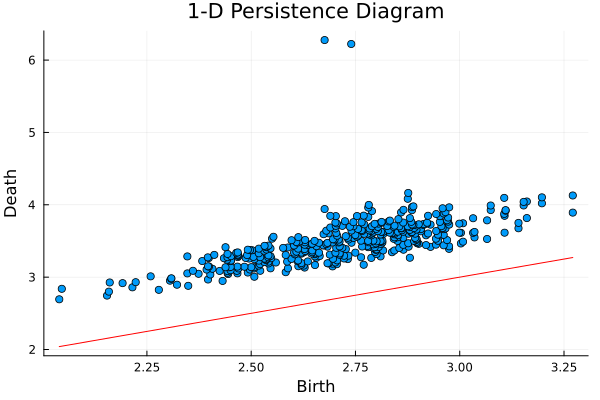

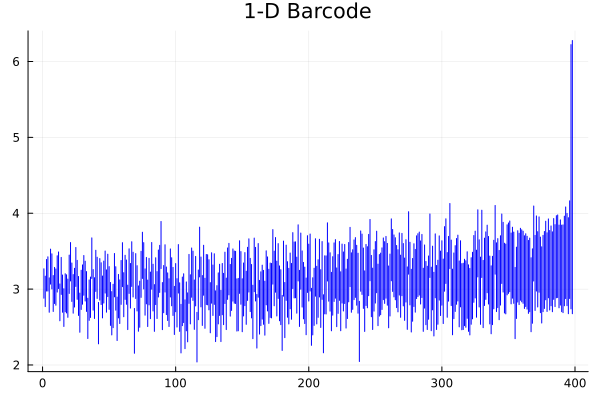

In [73]:
d1_result = result[2]
births_1 = [birth(interval) for interval in d1_result]
deaths_1 = [death(interval) for interval in d1_result]

p1_1 = scatter(births_1, deaths_1, xlabel="Birth", ylabel="Death", title="1-D Persistence Diagram", legend=false)
plot!(p1_1, x -> x, color=:red)
display(p1_1)

p2_1 = plot(title="1-D Barcode", legend=false)
for i in 1:length(births_1)
    plot!(p2_1, [i, i], [births_1[i], deaths_1[i]], label="", color=:blue)
end
display(p2_1)


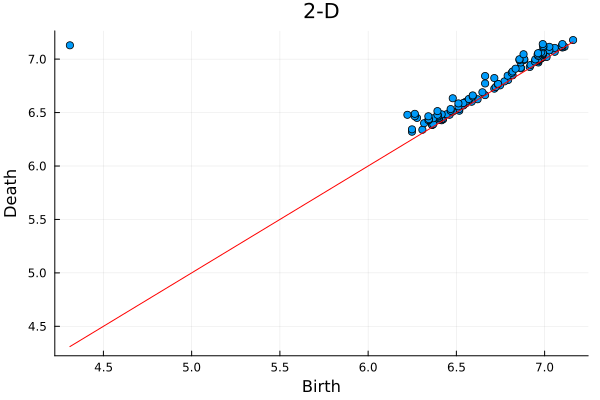

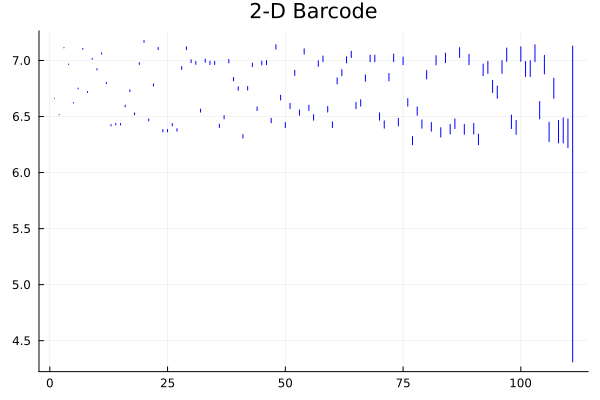

In [74]:
d2_result = result[3]
births_2 = [birth(interval) for interval in d2_result]
deaths_2 = [death(interval) for interval in d2_result]

p1_2 = scatter(births_2, deaths_2, xlabel="Birth", ylabel="Death", title="2-D", legend=false)
plot!(p1_2, x -> x, color=:red)
display(p1_2)

p2_2 = plot(title="2-D Barcode", legend=false)
for i in 1:length(births_2)
    plot!(p2_2, [i, i], [births_2[i], deaths_2[i]], label="", color=:blue)
end
display(p2_2)


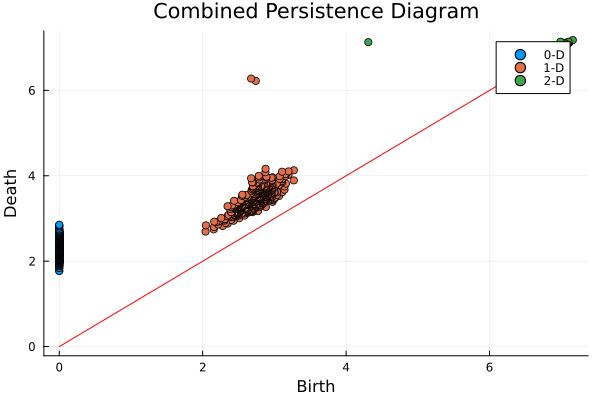

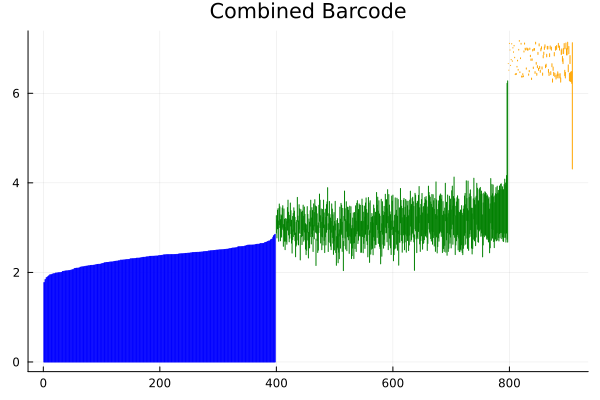

In [78]:
# making big diagram
p_combined = scatter(births, deaths, xlabel="Birth", ylabel="Death", title="Big Persistence Diagram", label="0-D", legend=:topright)
scatter!(p_combined, births_1, deaths_1, label="1-D")
scatter!(p_combined, births_2, deaths_2, label="2-D")
plot!(p_combined, x -> x, color=:red, label="")
display(p_combined)

# making big barcode
p_combined_barcode = plot(title="Barcode", legend=false)
for i in 1:length(births)
    plot!(p_combined_barcode, [i, i], [births[i], deaths[i]], label="", color=:blue)
end
for i in 1:length(births_1)
    plot!(p_combined_barcode, [i + length(births), i + length(births)], [births_1[i], deaths_1[i]], label="", color=:green)
end
for i in 1:length(births_2)
    plot!(p_combined_barcode, [i + length(births) + length(births_1), i + length(births) + length(births_1)], [births_2[i], deaths_2[i]], label="", color=:orange)
end
display(p_combined_barcode)